## TO DO:
* Figure out if always the second cluster 
* Get it to figure out which mdoel is best
* set random state
* make it faster!

In [1]:
import os
from glob import glob
import numpy as np
import pandas
from nilearn import image, input_data
import nibabel as ni
import scipy.stats as stats
from scipy.io import savemat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import FeatureAgglomeration
from sklearn.feature_extraction.image import grid_to_graph
import statsmodels.distributions.empirical_distribution as ed
from sklearn.mixture import GaussianMixture

In [2]:
wdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images'
ans = sorted(glob(os.path.join(wdir,'amyloid_negative/smoothed/*')))
aps = sorted(glob(os.path.join(wdir,'amyloid_positive/smoothed/*')))
s_scans = ans+aps
ica_scans = sorted(glob(os.path.join(wdir,'smoothed_ICA_regressed_scans/*')))
wtd_scans = sorted(glob(os.path.join(wdir,'smoothed_weighted_by_amyloid_T_test_scans/*')))
wi_scans = sorted(glob(os.path.join(wdir,'smoothed_weighted_and_ICA_regress_images/*')))
dkt = '/data1/users/jvogel/ADNI_tau/dkt_atlas_1p5mm.nii'

In [352]:
ica_scans2 = sorted(glob(os.path.join(wdir,'smoothed_ICA_regressed_scans_2/*')))

In [297]:
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


In [263]:
pdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_roi_data.csv')
pdf.drop(pdf.columns[78:],axis=1,inplace=True)
pdf.head()

,roi_1,roi_2,roi_3,roi_4,roi_5,roi_6,roi_7,roi_8,roi_9,roi_10,...,roi_69,roi_70,roi_71,roi_72,roi_73,roi_74,roi_75,roi_76,roi_77,roi_78
0,0.701645,0.676591,0.461776,0.527256,0.372574,0.447080,0.443195,0.408220,0.321967,0.628237,...,0.779303,0.569502,0.176098,0.706148,0.457584,0.541927,0.424773,0.524714,0.518405,0.616898
1,0.564308,0.368153,0.656585,0.700573,0.654706,0.371894,0.467564,0.825658,0.383969,0.610331,...,0.181682,0.662550,0.686077,0.496544,0.859984,0.496997,0.709937,0.673838,0.743749,0.719969
2,0.789790,0.348759,0.730640,0.247916,0.467068,0.314607,0.257625,0.584427,0.629005,0.484974,...,0.741756,0.577083,0.915049,0.426398,0.457865,0.892730,0.382639,0.898133,0.846154,0.700073
3,0.529252,0.641854,0.545657,0.226188,0.319547,0.379725,0.347738,0.465418,0.398971,0.391503,...,0.850852,0.514655,0.728162,0.440800,0.469000,0.765215,0.547062,0.757598,0.712874,0.642555
4,0.443489,0.390835,0.487892,0.535985,0.256538,0.561640,0.295780,0.377131,0.640701,0.484316,...,0.572651,0.349538,0.230229,0.403451,0.376962,0.425333,0.338289,0.388638,0.370255,0.377717


In [267]:
sorter = pandas.DataFrame(pdf,copy=True)
sorter.loc[:,'mean'] = pdf.mean(axis=1)
sorter.sort_values('mean',axis=0)
sorter2 = pandas.DataFrame(pdf,copy=True)
sorter2.loc['mean',:] = pdf.mean(axis=0)


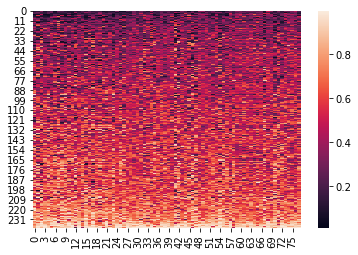

In [271]:
plt.close()
sns.heatmap(pdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [316]:
files_in = ica_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_ica_regr'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


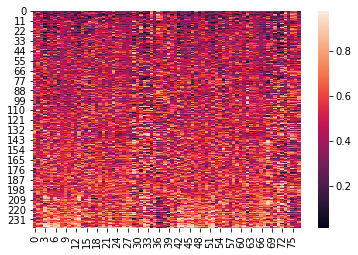

In [317]:
pdf_ica = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_ica_regr_roi_data.csv')
pdf_ica.drop(pdf_ica.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(pdf_ica,copy=True)
sorter.loc[:,'mean'] = pdf_ica.mean(axis=1)
plt.close()
sns.heatmap(pdf_ica.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [318]:
files_in = wtd_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_am_t_wtd'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


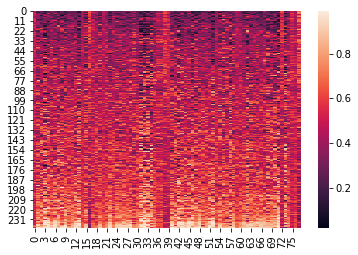

In [319]:
pdf_wtd = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_am_t_wtd_roi_data.csv')
pdf_wtd.drop(pdf_wtd.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(pdf_wtd,copy=True)
sorter.loc[:,'mean'] = pdf_wtd.mean(axis=1)
plt.close()
sns.heatmap(pdf_wtd.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [320]:
files_in = wi_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_wtd_and_ICA'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


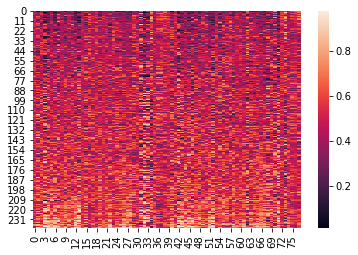

In [321]:
pdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/smoothed_vx_ref_wtd_and_ICA_roi_data.csv')
pdf_wi.drop(pdf_wi.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(pdf_wi,copy=True)
sorter.loc[:,'mean'] = pdf_wi.mean(axis=1)
plt.close()
sns.heatmap(pdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

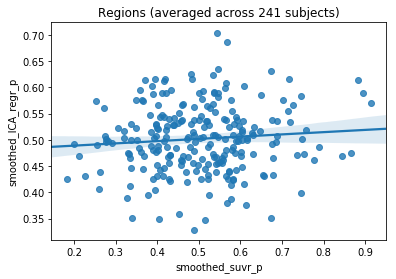

0.00780811241562


In [324]:
plt.close()
sns.regplot(pdf.mean(axis=1),pdf_ica.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_ICA_regr_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),pdf_ica.mean(axis=1))[0]**2)

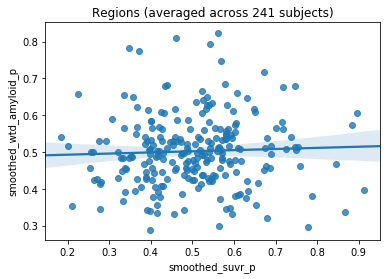

0.00180952590329


In [325]:
plt.close()
sns.regplot(pdf.mean(axis=1),pdf_wtd.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_wtd_amyloid_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),pdf_wtd.mean(axis=1))[0]**2)

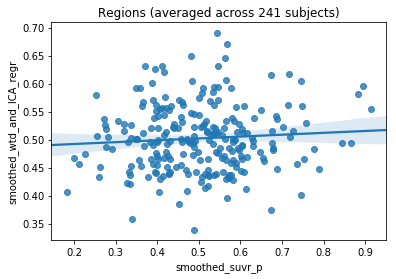

0.00563950151614


In [326]:
plt.close()
sns.regplot(pdf.mean(axis=1),pdf_wi.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_wtd_and_ICA_regr')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),pdf_wi.mean(axis=1))[0]**2)

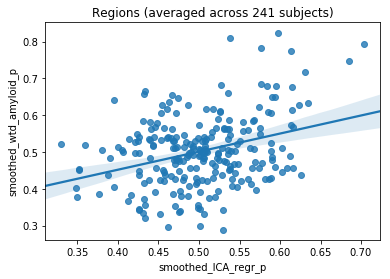

0.107124657319


In [327]:
plt.close()
sns.regplot(pdf_ica.mean(axis=1),pdf_wtd.mean(axis=1))
plt.xlabel('smoothed_ICA_regr_p')
plt.ylabel('smoothed_wtd_amyloid_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf_ica.mean(axis=1),pdf_wtd.mean(axis=1))[0]**2)

In [17]:
tdf = pandas.read_csv('/data1/users/jvogel/ADNI_tau/big_tau.csv',index_col = 0)
idf = pandas.read_csv('/data1/users/jvogel/ADNI_tau/template_space/tau_images/ica_values_basic_IC20_smoothed.csv')

In [90]:
tdf.columns

Index(['ID', 'visit', 'scandate', '1_OffTarget', '2_Frontal', '3_Temporal',
       '4_Temporoparietal', '5_Sensory', 'Hipp_OffTarget', 'Hipp_EarlyTau',
       'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'AV45', 'CDRSB', 'ADAS11',
       'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ', 'MOCA',
       'EcogSPTotal', 'EcogPtTotal', 'ICV', 'DX_fill', 'av45_status',
       'reference_date', 'time_difference_days', 'whole_hippocampus_AV1451',
       'av45_date', 'av45_time_difference_days', 'ADNI_MEM', 'ADNI_EF'],
      dtype='object')

In [91]:
idf.columns

Index(['subject', 'visit', 'ica_0', 'ica_1', 'ica_2', 'ica_3', 'ica_4',
       'ica_5', 'ica_6', 'ica_7', 'ica_8', 'ica_9', 'ica_10', 'ica_11',
       'ica_12', 'ica_13', 'ica_14', 'ica_15', 'ica_16', 'ica_17', 'ica_18',
       'ica_19', 'amyloid_status'],
      dtype='object')

In [19]:
for i,row in idf.iterrows():
    dx = tdf[(tdf.ID == row['subject']) & (tdf.visit == row['visit'])]['DX_fill'].values
    if len(dx) > 0:
        idf.loc[i,'DX'] = dx[0]

In [329]:
neg_index = idf[(idf.amyloid_status==0) & (idf.DX == 'NL')].index.tolist()

In [330]:
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_vx_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


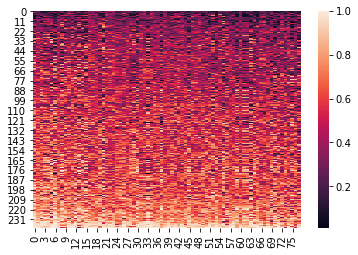

In [299]:
rpdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_vx_anmeg_NL_ref_roi_data.csv')
rpdf.drop(rpdf.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf,copy=True)
sorter.loc[:,'mean'] = rpdf.mean(axis=1)
sorter2 = pandas.DataFrame(rpdf,copy=True)
sorter2.loc['mean',:] = rpdf.mean(axis=0)
plt.close()
sns.heatmap(rpdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [300]:
for col in rpdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, rpdf[col].mean())

roi_72 [' Amygdala'] 0.565688764217
roi_23 [' Precuneus'] 0.564615171615
roi_53 [' Parahippocampal'] 0.563234737297
roi_47 [' Isthmus cingulate'] 0.556851581562
roi_8 [' Isthmus cingulate'] 0.55585600305
roi_63 [' Rostral anterior cingulate'] 0.555638614432
roi_33 [' Amygdala'] 0.551124383327
roi_62 [' Precuneus'] 0.550818365751
roi_35 [' Caudate'] 0.55052901563
roi_75 [' Hippocampus'] 0.549919492929
roi_44 [' fusiform'] 0.548943578529
roi_16 [' Pars opercularis'] 0.546020021163
roi_14 [' Parahippocampal'] 0.545656332358
roi_74 [' Caudate'] 0.545131818136
roi_36 [' Hippocampus'] 0.54473938652
roi_69 [' Transverse temporal'] 0.544233893498
roi_41 [' Caudal middle frontal'] 0.542537993859
roi_27 [' Superior parietal'] 0.542246903513
roi_52 [' Middle temporal'] 0.540171920611
roi_60 [' Posterior cingulate'] 0.537686997521
roi_30 [' Transverse temporal'] 0.536833841922
roi_59 [' Postcentral'] 0.536532900076
roi_29 [' Supramarginal'] 0.535420376718
roi_68 [' Supramarginal'] 0.534721139181
r

In [332]:
files_in = ica_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_ICA_regr_vx_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


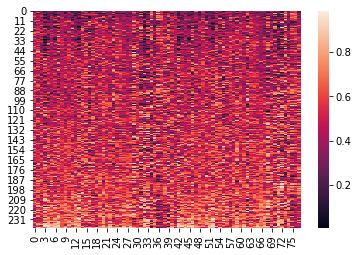

In [333]:
rpdf_ica = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_regr_vx_anmeg_NL_ref_roi_data.csv')
rpdf_ica.drop(rpdf_ica.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf_ica,copy=True)
sorter.loc[:,'mean'] = rpdf_ica.mean(axis=1)
plt.close()
sns.heatmap(rpdf_ica.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [334]:
files_in = wtd_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_wtd_am_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


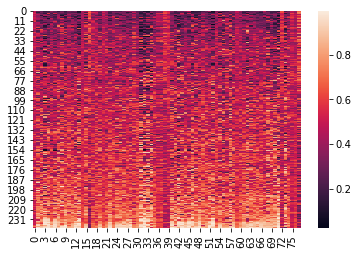

In [340]:
rpdf_wtd = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_wtd_am_anmeg_NL_ref_roi_data.csv')
rpdf_wtd.drop(rpdf_wtd.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf_wtd,copy=True)
sorter.loc[:,'mean'] = rpdf_wtd.mean(axis=1)
plt.close()
sns.heatmap(rpdf_wtd.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

In [341]:
files_in = wi_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/'
out_name = 'smoothed_ICA_wtd_am_anmeg_NL_ref'
ref_index = neg_index
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, ref_index=ref_index)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


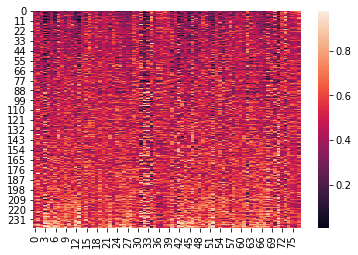

In [342]:
rpdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_wtd_am_anmeg_NL_ref_roi_data.csv')
rpdf_wi.drop(rpdf_wi.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(rpdf_wi,copy=True)
sorter.loc[:,'mean'] = rpdf_wi.mean(axis=1)
plt.close()
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index].values)
plt.show()

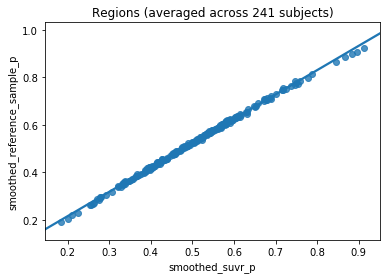

0.998434854982


In [344]:
plt.close()
sns.regplot(pdf.mean(axis=1),rpdf.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_reference_sample_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),rpdf.mean(axis=1))[0]**2)

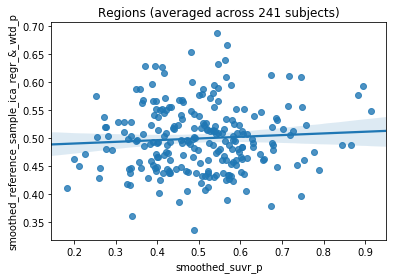

0.00456383594133


In [346]:
plt.close()
sns.regplot(pdf.mean(axis=1),rpdf_wi.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_reference_sample_ica_regr_&_wtd_p')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf.mean(axis=1),rpdf_wi.mean(axis=1))[0]**2)

In [360]:
dfs = {'suvr': pdf,'ica': pdf_ica, 'weighted': pdf_wtd, 'ICA+weighted': pdf_wi,
      'suvr+refsample': rpdf, 'ica+refsample': rpdf_ica, 'weight+refsample': rpdf_wtd, 'ICA+weighted+refsample':rpdf_wi}

for k,df in dfs.items():
    df.loc[:,'amyloid'] = idf.amyloid_status.values
    df.loc[:,'DX'] = idf.DX.values
    print('for',k)
    thits = []
    fhits = []
    for i,col in enumerate(df.columns[:78]):
        t,p = stats.ttest_ind(df[df.amyloid==0][col],
                            df[df.amyloid==1][col])
        if p < 0.05:
            thits.append(i)
        f,p2 = stats.f_oneway(df[df.DX=='NL'][col],
                              df[df.DX=='MCI'][col],
                              df[df.DX=='Dementia'][col])
        if p < 0.05:
            fhits.append(i)
    print('%s regions were different by amyloid group'%len(thits))
    print(thits)
    print('%s regions were different by disease group'%len(fhits))
    print(fhits)

for suvr
39 regions were different by amyloid group
[1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 19, 22, 24, 25, 26, 27, 28, 32, 35, 40, 42, 43, 44, 45, 46, 47, 48, 51, 52, 58, 61, 63, 64, 65, 67, 71, 74, 77]
39 regions were different by disease group
[1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 19, 22, 24, 25, 26, 27, 28, 32, 35, 40, 42, 43, 44, 45, 46, 47, 48, 51, 52, 58, 61, 63, 64, 65, 67, 71, 74, 77]
for ica
10 regions were different by amyloid group
[3, 21, 30, 32, 34, 38, 47, 49, 53, 77]
10 regions were different by disease group
[3, 21, 30, 32, 34, 38, 47, 49, 53, 77]
for weighted
13 regions were different by amyloid group
[3, 5, 6, 10, 29, 36, 37, 38, 45, 49, 55, 56, 77]
13 regions were different by disease group
[3, 5, 6, 10, 29, 36, 37, 38, 45, 49, 55, 56, 77]
for ICA+weighted
12 regions were different by amyloid group
[3, 29, 30, 32, 34, 36, 37, 38, 45, 47, 49, 77]
12 regions were different by disease group
[3, 29, 30, 32, 34, 36, 37, 38, 45, 47, 49, 77]
for suvr+refsample
32 regions wer

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


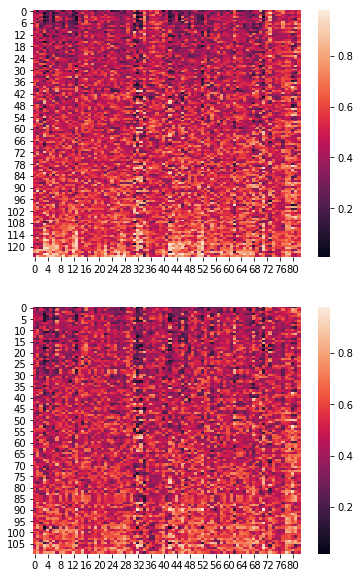

In [349]:
rpdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_wtd_am_anmeg_NL_ref_roi_data.csv')
sorter = pandas.DataFrame(rpdf_wi,copy=True)
sorter.loc[:,'mean'] = rpdf_wi.mean(axis=1)
plt.close()
fig,(ax1,ax2) = plt.subplots(2,figsize=(6,10))
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.amyloid==0].values,ax=ax1)
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.amyloid==1].values,ax=ax2)
plt.show()

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


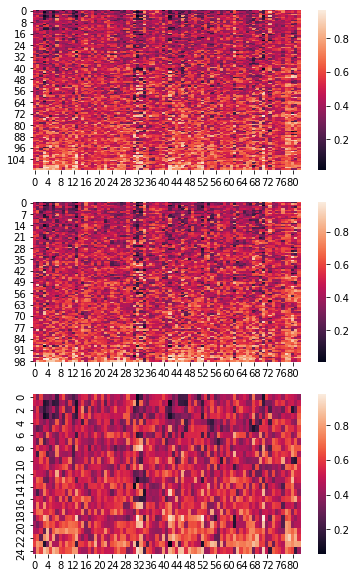

In [350]:
rpdf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_am_neg_NL_ref/smoothed_ICA_wtd_am_anmeg_NL_ref_roi_data.csv')
sorter = pandas.DataFrame(rpdf_wi,copy=True)
sorter.loc[:,'mean'] = rpdf_wi.mean(axis=1)
plt.close()
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(6,10))
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.DX=='NL'].values,ax=ax1)
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.DX=='MCI'].values,ax=ax2)
sns.heatmap(rpdf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index][rpdf.DX=='Dementia'].values,ax=ax3)
plt.show()

In [202]:
files_in = s_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_SUVR'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


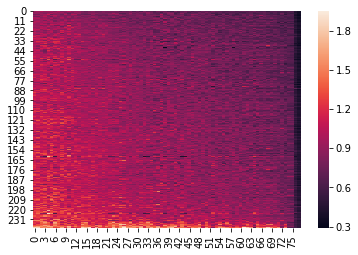

In [71]:
ndf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_SUVR_roi_data.csv')
ndf.drop(ndf.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf,copy=True)
sorter.loc[:,'mean'] = ndf.mean(axis=1)
sorter2 = pandas.DataFrame(ndf,copy=True)
sorter2.loc['mean',:] = ndf.mean(axis=0)
plt.close()
sns.heatmap(ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [236]:
files_in = ica_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_ICA_regr'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


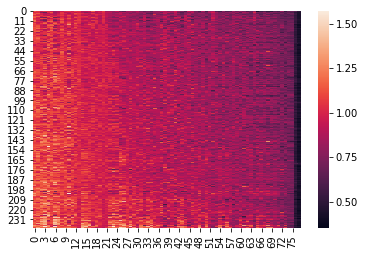

In [70]:
ndf_ica = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_ICA_regr_roi_data.csv')
ndf_ica.drop(ndf_ica.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_ica,copy=True)
sorter.loc[:,'mean'] = ndf_ica.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_ica,copy=True)
sorter2.loc['mean',:] = ndf_ica.mean(axis=0)
plt.close()
sns.heatmap(ndf_ica.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [354]:
files_in = ica_scans2
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_ICA_regr_2'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


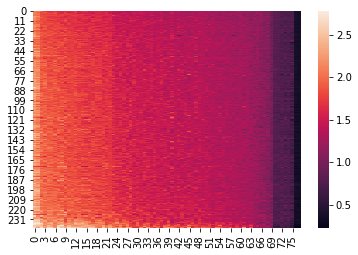

In [69]:
ndf_ica2 = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_ICA_regr_2_roi_data.csv')
ndf_ica2.drop(ndf_ica2.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_ica2,copy=True)
sorter.loc[:,'mean'] = ndf_ica2.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_ica2,copy=True)
sorter2.loc['mean',:] = ndf_ica2.mean(axis=0)
plt.close()
sns.heatmap(ndf_ica2.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [239]:
files_in = wtd_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_wtd_amyloid'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


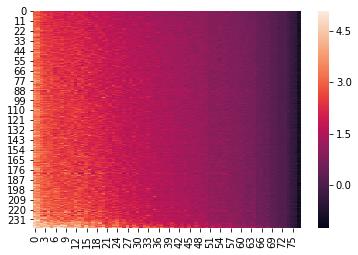

In [68]:
ndf_wtd = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_wtd_amyloid_roi_data.csv')
ndf_wtd.drop(ndf_wtd.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_wtd,copy=True)
sorter.loc[:,'mean'] = ndf_wtd.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_wtd,copy=True)
sorter2.loc['mean',:] = ndf_wtd.mean(axis=0)
plt.close()
sns.heatmap(ndf_wtd.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [243]:
files_in = wi_scans
atlas = dkt
ref = None
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_wtd_and_ICA_regr'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True)

initiating...
loading data...
processing 241 subjects
masking data...
skipping ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


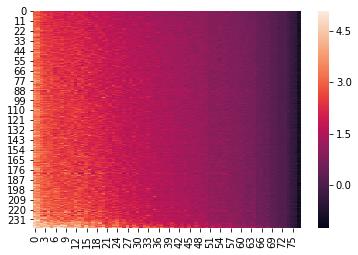

In [67]:
ndf_wi = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_wtd_amyloid_roi_data.csv')
ndf_wi.drop(ndf_wi.columns[78:],axis=1,inplace=True)
sorter = pandas.DataFrame(ndf_wi,copy=True)
sorter.loc[:,'mean'] = ndf_wi.mean(axis=1)
sorter2 = pandas.DataFrame(ndf_wi,copy=True)
sorter2.loc['mean',:] = ndf_wi.mean(axis=0)
plt.close()
sns.heatmap(ndf_wi.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

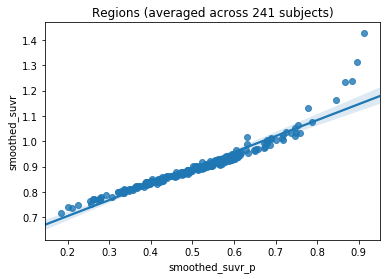

0.902874208062


In [305]:
plt.close()
sns.regplot(pdf[pdf.columns[:78]].mean(axis=1),ndf.mean(axis=1))
plt.xlabel('smoothed_suvr_p')
plt.ylabel('smoothed_suvr')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(pdf[pdf.columns[:78]].mean(axis=1),ndf.mean(axis=1))[0]**2)

In [250]:
ndfs = {'suvr': ndf,'ica': ndf_ica, 'ica_2': ndf_ica2, 'weighted': ndf_wtd, 'ICA+weighted': ndf_wi, 
        'mixture_model -- VOXELWISE': mmdf, 'mixture_model -- REGIONWISE 2Comp': mm_ndf_simple, 
        'mixture_model -- REGIONWISE-complicated': mm_ndf, 'mixture_model -- REGIONWISE-BestComponent': mm_ndf_alt,
        'mixture_model -- REGIONWISE-BestComponent_Inverted': mm_ndf_alt_inv, 'MM_ICA2': mm_ndf_ica2_simple}

suvr = []
mm = []
for k,df in ndfs.items():
    df.loc[:,'amyloid'] = idf.amyloid_status.values
    df.loc[:,'DX'] = idf.DX.values
    print('for',k)
    thits = []
    fhits = []
    for i,col in enumerate(df.columns[:78]):
        t,p = stats.ttest_ind(df[df.amyloid==0][col],
                            df[df.amyloid==1][col])
        if p < 0.05:
            thits.append(i)
            if k == 'suvr':
                suvr.append([i,t])
            elif k == 'mixture_model':
                mm.append([i,t])
        f,p2 = stats.f_oneway(df[df.DX=='NL'][col],
                              df[df.DX=='MCI'][col],
                              df[df.DX=='Dementia'][col])
        if p2 < 0.05:
            fhits.append(i)
    print('%s regions were different by amyloid group'%len(thits))
    #print(thits)
    print('%s regions were different by disease group'%len(fhits))
    #print(fhits)

for suvr
47 regions were different by amyloid group
52 regions were different by disease group
for ica
6 regions were different by amyloid group
4 regions were different by disease group
for ica_2
8 regions were different by amyloid group
4 regions were different by disease group
for weighted
11 regions were different by amyloid group
0 regions were different by disease group
for ICA+weighted
11 regions were different by amyloid group
0 regions were different by disease group
for mixture_model -- VOXELWISE
51 regions were different by amyloid group
58 regions were different by disease group
for mixture_model -- REGIONWISE 2Comp
54 regions were different by amyloid group
52 regions were different by disease group
for mixture_model -- REGIONWISE-complicated
45 regions were different by amyloid group
41 regions were different by disease group
for mixture_model -- REGIONWISE-BestComponent
53 regions were different by amyloid group
48 regions were different by disease group
for mixture_mode

In [33]:
list(zip(suvr,mm))

[([1, -3.6197348294263061], [1, -3.9289997491541842]),
 ([3, -2.7494687372788817], [2, -2.036903679272716]),
 ([4, -4.0304555049318065], [3, -4.8187017390296871]),
 ([5, -2.6992123695130932], [4, -4.5499272748183746]),
 ([6, -4.1373462942594523], [5, -2.9146353960339235]),
 ([7, -3.2093748128016717], [6, -5.1071742326220733]),
 ([8, -2.4961806459376632], [7, -3.8610690214673089]),
 ([9, -2.2343212315142007], [8, -3.2753466187806577]),
 ([10, -2.4323368367394691], [9, -3.0305949980313072]),
 ([12, -4.3142819225723255], [10, -2.6997200047275181]),
 ([13, -4.0459810437969299], [11, -2.2443710158030474]),
 ([15, -2.7870116187806362], [12, -4.4196999432890269]),
 ([19, -3.0395373880954542], [13, -4.3177949312695105]),
 ([21, -2.1438744048500444], [15, -2.8868125316082556]),
 ([22, -3.8642560250758828], [19, -3.2206252029766187]),
 ([24, -3.3307768338407198], [20, -3.0680030945576511]),
 ([25, -3.156921213206942], [21, -2.3084949775317214]),
 ([26, -4.2972885238913863], [22, -4.0522501797855

In [8]:
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
outdir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/'
out_name = 'smoothed_SUVR_mixturemodel'
prepare_PET_data(files_in, atlas = dkt, ref = ref, out_dir = outdir, out_name = out_name, save_images = True, mx_model=2)

initiating...
loading data...
processing 241 subjects
masking data...
generating voxelwise ECDF...
transforming back into image space
generating final subject x region matrix
preparing outputs


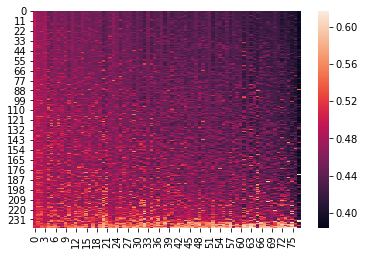

In [57]:
mmdf = pandas.read_csv(
    '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_regular_images/smoothed_SUVR_mixturemodel_roi_data.csv')
mmdf.drop(mmdf.columns[78:],axis=1,inplace=True)
msorter = pandas.DataFrame(mmdf,copy=True)
msorter.loc[:,'mean'] = mmdf.mean(axis=1)
msorter2 = pandas.DataFrame(mmdf,copy=True)
msorter2.loc['mean',:] = mmdf.mean(axis=0)
plt.close()
sns.heatmap(mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

In [44]:
todrop = ['amyloid','DX']
ndf.drop(todrop,axis=1,inplace=True)
#mmdf.drop(todrop,axis=1,inplace=True)

ValueError: labels ['amyloid' 'DX'] not contained in axis

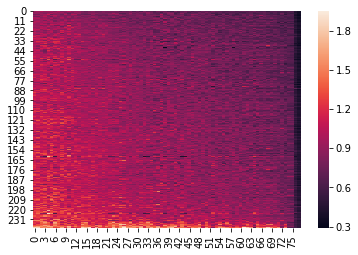

In [56]:
plt.close()
sorter = pandas.DataFrame(ndf,copy=True)
sorter.loc[:,'mean'] = ndf.mean(axis=1)
sorter2 = pandas.DataFrame(ndf,copy=True)
sorter2.loc['mean',:] = ndf.mean(axis=0)
sns.heatmap(ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.show()

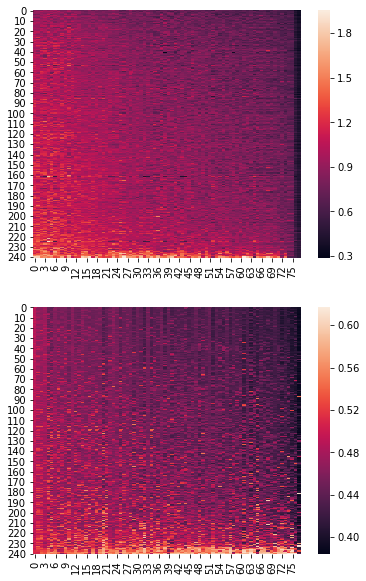

In [59]:
plt.close()
fig,(ax1,ax2) = plt.subplots(2,figsize=(6,10))
sns.heatmap(ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values,ax=ax1)
sns.heatmap(mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns].values,ax=ax2)
plt.show()

In [61]:
mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns]

,roi_1,roi_76,roi_77,roi_17,roi_56,roi_19,roi_31,roi_58,roi_39,roi_43,...,roi_9,roi_11,roi_69,roi_46,roi_45,roi_52,roi_2,roi_5,roi_18,roi_73
210,0.488024,0.467094,0.464340,0.472225,0.449632,0.457091,0.461662,0.453349,0.448665,0.455123,...,0.417001,0.418511,0.424378,0.420216,0.406944,0.425393,0.415851,0.400517,0.402557,0.392620
236,0.491677,0.464738,0.462361,0.471961,0.445793,0.439398,0.462642,0.455581,0.453503,0.457513,...,0.416364,0.415359,0.425291,0.423236,0.410648,0.416241,0.410657,0.399797,0.399236,0.394087
9,0.491275,0.464161,0.462941,0.479427,0.441440,0.444852,0.465165,0.450611,0.455478,0.454342,...,0.413616,0.419307,0.430789,0.417709,0.401881,0.413138,0.404817,0.410074,0.406649,0.391968
17,0.489810,0.468064,0.468130,0.471250,0.449176,0.444777,0.463814,0.449601,0.455311,0.456678,...,0.426254,0.413522,0.434742,0.415855,0.420083,0.423938,0.402820,0.399210,0.399454,0.389786
37,0.487591,0.478189,0.467195,0.471841,0.442869,0.456067,0.457827,0.460271,0.460200,0.452146,...,0.421181,0.420378,0.422952,0.414736,0.405257,0.416648,0.416670,0.404949,0.406865,0.390857
189,0.492427,0.469698,0.466656,0.469522,0.442509,0.449634,0.457558,0.449557,0.460763,0.454469,...,0.418192,0.418246,0.424858,0.423883,0.406461,0.417478,0.406605,0.431992,0.398400,0.389575
174,0.487853,0.464033,0.461485,0.469483,0.474349,0.447253,0.465042,0.453413,0.450328,0.458634,...,0.417418,0.421130,0.426779,0.423359,0.402838,0.423430,0.410752,0.406665,0.400272,0.388824
122,0.488982,0.472412,0.464719,0.487937,0.485177,0.438709,0.460833,0.453925,0.451924,0.459525,...,0.416210,0.415935,0.428253,0.418273,0.404014,0.415659,0.419215,0.408101,0.412562,0.385913
94,0.487765,0.468715,0.470367,0.470132,0.447773,0.448220,0.462723,0.449594,0.454090,0.458996,...,0.428813,0.413206,0.432486,0.415042,0.421149,0.423788,0.402370,0.399118,0.399423,0.392068
5,0.496963,0.473914,0.467835,0.476639,0.460310,0.438568,0.458866,0.450039,0.462722,0.454912,...,0.423785,0.424627,0.420420,0.417476,0.403812,0.412260,0.404801,0.402735,0.439758,0.390621


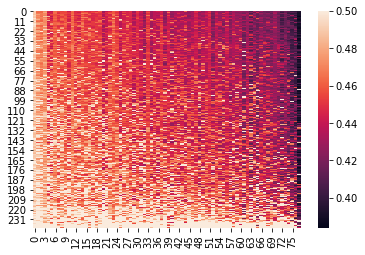

In [66]:
plt.close()
sns.heatmap(mmdf.loc[msorter.sort_values('mean',axis=0,ascending=True).index
                    ][msorter2.sort_values('mean',axis=1,ascending=False).columns].values,
           vmax=0.5)
plt.show()

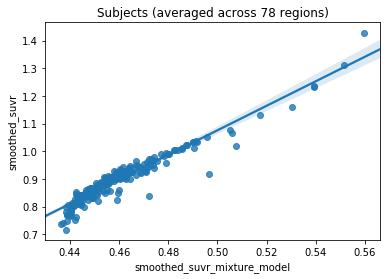

0.917669359624


In [76]:
plt.close()
sns.regplot(mmdf.mean(axis=1),ndf.mean(axis=1))
plt.xlabel('smoothed_suvr_mixture_model')
plt.ylabel('smoothed_suvr')
plt.title('Subjects (averaged across 78 regions)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=1),ndf.mean(axis=1))[0]**2)

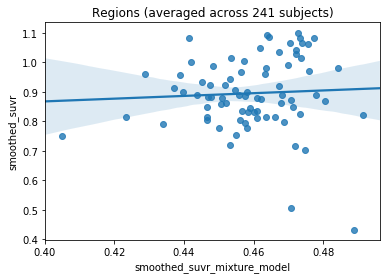

0.00313617042958


In [77]:
plt.close()
sns.regplot(mmdf.mean(axis=0),ndf.mean(axis=0))
plt.xlabel('smoothed_suvr_mixture_model')
plt.ylabel('smoothed_suvr')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=0),ndf.mean(axis=0))[0]**2)

In [7]:
def prepare_PET_data(files_in, atlas, ref = None, msk = None, dimension_reduction = False,
                     ECDF_in = None, output_type = 'py', out_dir = './', out_name = 'PET_data', 
                     save_matrix = False, save_ECDF = False, save_images = False, ref_index = [],
                    mx_model = 0):
    ''' This is a function that will take several PET images and an atlas and will
    return a subject X region matrix. If specified, the function will also calculate 
    probabilities (via ECDF) either voxelwise, or using a specified reference region
    
    files_in = input can either be 
        - a path to a directory full of (only) nifti images OR
        - a "search string" using wildcards
        - a list of subject paths OR
        - a subject X image matrix
        
    altas = a path to a labeled regional atlas in the same space as the PET data
    
    ref = multiple options:
        - If None, no probabilities will be calculated, and script will simply extract
        regional PET data using the atlas.
        - If a path to a reference region mask, will calculate voxelwise probabilities
        based on values within the reference region. Mask must be in the same space as 
        as PET data and atlas
        - If a list of integers, will combine these atlas labels with these integers to 
        make reference region 
        - if 'voxelwise', voxelwise (or atom-wise from dimension reduction) probabilities
        will be estimated. In other words, each voxel or atom will use serve as its own
        reference.
        
    msk = A path to a binary mask file in the same space as PET data and atlas. If None,
        mask will be computed as a binary mask of the atlas.
        ** PLEASE NOTE: The mask will be used to mask the reference region! **
    
    dimension_reduction = whether or not to first reduce dimensions of data using
    hierarchical clustering. This results in an initial step that will be very slow, but 
    will may result in an overall speedup for the script, but perhaps only if ref is set 
    to 'voxelwise'.
        - If None, do not perform dimension reduction
        - If integer, the number of atoms (clusters) to reduce to
    
    ECDF_in = If the user wishes to apply an existing ECDF to the PET data instead of
        generating one de novo, that can be done here. This crucial if the user wishes to
        use multiple datasets. Think of it like scaling in machine learning.
        - If None, will generate ECDF de novo.
        - If np.array, will use this array to generate the ECDF.
        - If statsmodel ECDF object, will use this as ECDF
        - If a path, will use the
    
    output_type = type of file to save final subject x region matrix into. multiple options:
        -- 'py' will save matrix into a csv
        -- 'mat' will save matrix into a matfile
    
    out_dir = location to save output files. Defaults to current directory
    
    out_name = the prefix for all output files
    
    save_matrix = Whether to save or return subject x image matrix. Useful if running multiple 
        times, as this matrix can be set as files_in, bypassing the costly data import
        -- if 'return', will return subject x image matrix to python environment
        -- if 'save', will write subject x image matrix to file. 
        -- if None, matrix will not be stored
    
    save_ECDF = whether to save the ECDF used to create the probabilities. This is crucial if 
        using multiple datasets. The resulting output can be used as input for the ECDF argument.
        -- if 'return, will return np.array to python environment
        -- if 'save', will write array to file
        -- if None, array will not be stored
    
    '''
    # Check input arguments
    print('initiating...')
    if output_type != 'py' and output_type != 'mat':
        raise IOError('output_type must be set to py or mat')
    
    
    # Initialize variables
    
    # Load data
    print('loading data...')
    i4d = load_data(files_in) # load PET data
    if save_matrix == 'save':
        otpt = os.path.join(out_dir,'%s_4d_data'%out_name)
        print('saving 4d subject x scan to nifti image: \n',otpt)
        i4d.to_filename(otpt)
    
    # load atlas
    atlas = ni.load(atlas).get_data().astype(int) 
    if atlas.shape != i4d.shape[:3]:
        raise ValueError('atlas dimensions do not match PET data dimensions')
    
    # load reference region
    if type(ref) == str and ref != 'voxelwise': 
        print('looking for reference image...')
        if not os.path.isdir(ref):
            raise IOError('Please enter a valid path for ref, or select a different option for this argument')
        else:
            ref_msk = ni.load(ref).get_data()
            if ref_msk.shape != i4d.shape[:3]:
                raise ValueError('ref region image dimensions do not match PET data dimensions')
    elif type(ref) == list:
        ref_msk = np.zeros_like(atlas)
        for i in ref:
            ref_msk[atlas == i] = 1
    else:
        ref_msk = None
    
    
    # Mask data
    print('masking data...')
    if msk == None:
        img_mask = np.array(atlas,copy=True)
        img_mask[img_mask<1] = 0
        img_mask[img_mask>0] = 1
    else:
        img_mask = ni.load(msk).get_data()
        atlas[img_mask < 1] = 0
    
    if type(ref_msk) != type(None):
        ref_msk[img_mask < 1] = 0
    
    mask_tfm = input_data.NiftiMasker(ni.Nifti1Image(img_mask,i4d.affine))
    mi4d = mask_tfm.fit_transform(i4d)
    
    # dimension reduction (IN BETA!)
    if dimension_reduction:
        print('reducing dimensions...')
        shape = img_mask.shape
        connectivity = grid_to_graph(n_x=shape[0], n_y=shape[1],
                                   n_z=shape[2], mask=img_mask)
    # main ECDF calculation (or mixture model calc)
    skip = False
    if ref != 'voxelwise':
        if type(ECDF_in) != type(None): 
            print('generating ECDF...')
            print('using user-supplied data...')
            if type(ECDF_in) == ed.ECDF:
                mi4d_ecdf, ecref = ecdf_simple(mi4d, ECDF_in, mx=mx_model)
                input_distribution = 'not generated'
            elif type(ECDF_in) == np.ndarray:
                mi4d_ecdf, ecref = ecdf_simple(mi4d, ECDF_in, mx=mx_model)
                input_distribution = ECDF_in
    #       elif # add later an option for importing an external object 
            else:
                try:
                    mi4d_ecdf, ecref = ecdf_simple(mi4d, ECDF_in, mx=mx_model)
                    print('Could not understand ECDF input, but ECDF successful')
                    input_distribution = 'not generated'
                except:
                    raise IOError(
                            'Invalid argument for ECDF in. Please enter an ndarray, an ECDF object, or a valid path')
        else:
            if type(ref_msk) != type(None):
                print('generating ECDF...')
                ref_tfm = input_data.NiftiMasker(ni.Nifti1Image(ref_msk,i4d.affine))
                refz = ref_tfm.fit_transform(i4d)
                mi4d_ecdf, ecref = ecdf_simple(mi4d, refz, mx=mx_model)
                input_distribution = refz.flat
            else:
                print('skipping ECDF...')
                skip = True
    
    else:
        print('generating voxelwise ECDF...')
        mi4d_ecdf, ECDF_array = ecdf_voxelwise(mi4d, ref_index, save_ECDF, mx=mx_model)
        input_distribution = 'not generated'
        
    if not skip:
#       if save_ECDF:
#           create an array and somehow write it to a file
        
    # transform back to image-space
        print('transforming back into image space')
        f_images = mask_tfm.inverse_transform(mi4d_ecdf)
    
    else:
        #if type(ECDF):
        print('transforming back into image space')
        f_images = mask_tfm.inverse_transform(mi4d)
    
    # generate output matrix
    print('generating final subject x region matrix')
    f_mat = generate_matrix_from_atlas(f_images, atlas)
    
    # compile (and save) outputs
    print('preparing outputs')
    output = {}
    if output_type == 'py':
        f_mat.to_csv(os.path.join(out_dir, '%s_roi_data.csv'%out_name),index=False)
        output.update({'roi_matrix': f_mat})
    else:
        output.update({'roi_matrix': fmat.values})
        output.update({'roi_matrix_columns': fmat.columns})
    if save_matrix == 'return':
        output.update({'4d_image_matrix': i4d})
    if save_ECDF == 'return':
        if output_type == 'py':
            output.update({'ECDF_function': ECDF_array})
        else:
            output.update({'input_distribution': input_distribution})
    
def load_data(files_in):
    
    fail = False
    
    if type(files_in) == str:
        if os.path.isdir(files_in):
            print('It seems you passed a directory')
            search = os.path.join(files_in,'*')
            num_f = len(glob(search))
            if num_f == 0:
                raise IOError('specified directory did not contain any files')
            else:
                print('found %s images!'%num_f)
            i4d = image.load_img(search)
        elif '*' in files_in:
            print('It seems you passed a search string')
            num_f = len(glob(files_in))
            if num_f == 0:
                raise IOError('specified search string did not result in any files')
            else:
                print('found %s images'%num_f)
            i4d = image.load_img(files_in)
        else:
            fail = True
    elif type(files_in) == list:
        print('processing %s subjects'%len(files_in))
        i4d = ni.concat_images(files_in)
    elif type(files_in) == ni.nifti1.Nifti1Image:
        print('processing %s subjects'%files_in.shape[-1])
        i4d = files_in
    else:
        fail = True
        
    if fail:
        print('files_in not recognized.', 
                    'Please enter a search string, valid directory, list of subjects, or matrix')
        raise ValueError('I do not recognize the files_in input.')
    
    return i4d

def dim_reduction(mi4d, connectivity, dimension_reduction):
    ward = FeatureAgglomeration(n_clusters=dimension_reduction/2,
            connectivity=connectivity, linkage='ward', memory='nilearn_cache')
    ward.fit(mi4d)
    ward = FeatureAgglomeration(n_clusters=dimension_reduction,
            connectivity=connectivity, linkage='ward', memory='nilearn_cache')
    ward.fit(mi4d)                                                         
    mi4d = ward.transform(mi4d)

    return mi4d

def ecdf_simple(mi4d, refz, mx=0):

    if type(refz) == ed.ECDF:
        ecref = refz
    else:
        if len(refz.shape) > 1:
            ecref = ed.ECDF(refz.flat)
        else:
            ecref = ed.ECDF(refz)
    print('transforming images...')
    if mx == 0:
        mi4d_ecdf = ecref(mi4d.flat).reshape(mi4d.shape[0],mi4d.shape[1])
    else:
        print('are you sure it makes sense to use a mixture model on reference region?')
        mod = GaussianMixture(n_components=mx).fit(ecref)
        mi4d_ecdf = mod.predict_proba(mi4d.flat)[:,-1].reshape(mi4d.shape[0],mi4d.shape[1])

    return mi4d_ecdf, ecref   

def ecdf_voxelwise(mi4d, ref_index, save_ECDF, mx=0):
    
    X,y = mi4d.shape
    if mx != 0: 
        mmod = GaussianMixture(n_components=mx)
    
    if len(ref_index) == 0:
        if not save_ECDF:
            if mx == 0:
                mi4d_ecdf = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)]).transpose()
            else:
                mi4d_ecdf = np.array([mmod.fit(mi4d[:,x].reshape(-1,1)).predict_proba(mi4d[:,x].reshape(-1,1)
                                                                                    )[:,-1] for x in range(y)]).transpose()
            ECDF_array = None    
        else:
            if mx == 0:
                ECDF_array = np.array([ed.ECDF(mi4d[:,x]) for x in range(y)]).transpose()
                print('transforming data...')
                mi4d_ecdf = np.array([ECDF_matrix[x](mi4d[:,x]) for x in range(y)]
                                         ).transpose()
            else:
                raise IOError('at this stage, cant save mixture model info....sorry...')
    else:
        if mx == 0:
            # if you don't want to include subjects used for reference, un-hash this, hash
            # the next line, and fix the "transpose" line so that the data gets back into the matrix properly
            #good_ind = [x for x in list(range(X)) if x not in ref_index]
            good_ind = range(X)
            if not save_ECDF:    
                mi4d_ecdf = np.array([ed.ECDF(mi4d[ref_index,x])(mi4d[good_ind,x]) for x in range(y)]
                                    ).transpose()
                ECDF_array = None
            else:
                ECDF_array = [ed.ECDF(mi4d[ref_index,x]) for x in range(y)]
                print('transforming data...')
                mi4d_ecdf = ecdf_voxelwise = np.array([ECDF_matrix[x](mi4d[good_ind,x]) for x in range(y)]
                                         ).transpose()
        else:
            ### COMING SOON!
            raise IOError('have not yet set up implementation for mixture models and reg groups')
        
    return mi4d_ecdf, ECDF_array

def generate_matrix_from_atlas(files_in, atlas):
    
    files_in = files_in.get_data()
    atlas = atlas.astype(int)
    f_mat = pandas.DataFrame(index = range(files_in.shape[-1]),
                             columns = ['roi_%s'%x for x in np.unique(atlas) if x != 0])
    tot = np.bincount(atlas.flat)
    for sub in range(files_in.shape[-1]):
        mtx = files_in[:,:,:,sub]
        sums = np.bincount(atlas.flat, weights = mtx.flat)
        rois = (sums/tot)[1:]
        f_mat.loc[f_mat.index[sub]] = rois
        
    return f_mat



In [5]:
scans = sorted(glob('/Users/jakevogel/Science/tau/nan_snorm_*002*'))
i4d = load_data(scans)

processing 6 subjects


In [363]:
#trial = s_scans[:4] + s_scans[-20:-16]
#files_in = trial
files_in = s_scans
atlas = dkt
ref = 'voxelwise'
out_dir = '/data1/users/jvogel/ADNI_tau/template_space/tau_images/esm_prep/smoothed_voxelwise_ref/'
out_name = 'smoothed_vx_ref_ica_regr'
msk = None 
dimension_reduction = False
ECDF_in = None 
output_type = 'py'
save_matrix = False
save_ECDF = False
save_images = False
ref_index = []


# Check input arguments
print('initiating...')
if output_type != 'py' and output_type != 'mat':
    raise IOError('output_type must be set to py or mat')


# Initialize variables

# Load data
print('loading data...')
i4d = load_data(files_in) # load PET data
if save_matrix == 'save':
    otpt = os.path.join(out_dir,'%s_4d_data'%out_name)
    print('saving 4d subject x scan to nifti image: \n',otpt)
    i4d.to_filename(otpt)

# load atlas
atlas = ni.load(atlas).get_data().astype(int) 
if atlas.shape != i4d.shape[:3]:
    raise ValueError('atlas dimensions do not match PET data dimensions')

# load reference region
if type(ref) == str and ref != 'voxelwise': 
    print('looking for reference image...')
    if not os.path.isdir(ref):
        raise IOError('Please enter a valid path for ref, or select a different option for this argument')
    else:
        ref_msk = ni.load(ref).get_data()
        if ref_msk.shape != i4d.shape[:3]:
            raise ValueError('ref region image dimensions do not match PET data dimensions')
elif type(ref) == list:
    ref_msk = np.zeros_like(atlas)
    for i in ref:
        ref_msk[atlas == i] = 1
else:
    ref_msk = None


# Mask data
print('masking data...')
if msk == None:
    img_mask = np.array(atlas,copy=True)
    img_mask[img_mask<1] = 0
    img_mask[img_mask>0] = 1
else:
    img_mask = ni.load(msk).get_data()
    atlas[img_mask < 1] = 0

if type(ref_msk) != type(None):
    ref_msk[img_mask < 1] = 0

mask_tfm = input_data.NiftiMasker(ni.Nifti1Image(img_mask,i4d.affine))
mi4d = mask_tfm.fit_transform(i4d)

# dimension reduction (IN BETA!)
if dimension_reduction:
    print('reducing dimensions...')
    shape = img_mask.shape
    connectivity = grid_to_graph(n_x=shape[0], n_y=shape[1],
                               n_z=shape[2], mask=img_mask)

initiating...
loading data...
processing 241 subjects
masking data...


In [259]:
ECDF_in = None
X,y = mi4d.shape

if len(ref_index) == 0:
    if not save_ECDF:
        mi4d_ecdf = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)]).reshape(X,y)
        ECDF_array = None
    else:
        ECDF_array = np.array([ed.ECDF(mi4d[:,x]) for x in range(y)]).reshape(X,y)
        print('transforming data...')
        mi4d_ecdf = np.array([ECDF_matrix[x](mi4d[:,x]) for x in range(y)]
                                 ).reshape(X,y)
else:
    # if you don't want to include subjects used for reference, un-hash this, hash
    # the next line, and fix the "transpose" line so that the data gets back into the matrix properly
    #good_ind = [x for x in list(range(X)) if x not in ref_index]
    good_ind = range(X)
    if not save_ECDF:    
        mi4d_ecdf = np.array([ed.ECDF(mi4d[ref_index,x])(mi4d[good_ind,x]) for x in range(y)]
                            ).reshape(X,y)
        ECDF_array = None
    else:
        ECDF_array = [ed.ECDF(mi4d[ref_index,x]) for x in range(y)]
        print('transforming data...')
        mi4d_ecdf = ecdf_voxelwise = np.array([ECDF_matrix[x](mi4d[good_ind,x]) for x in range(y)]
                                 ).reshape(X,y)

In [260]:
inter = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)])

In [ ]:
me_trans = np.array([ed.ECDF(mi4d[:,x])(mi4d[:,x]) for x in range(y)]).transpose()

In [270]:
print(inter.shape)
print(mi4d.shape)
print(mi4d_ecdf.shape)
print(me_trans.shape)

(354736, 8)
(8, 354736)
(8, 354736)
(8, 354736)


In [273]:
mi4d[:,90000]

array([ 1.00283515,  0.77797401,  1.02097845,  0.7926057 ,  1.41267788,
        0.61282933,  0.75810754,  1.20101714])

In [274]:
inter[90000,:]

array([ 0.625,  0.375,  0.75 ,  0.5  ,  1.   ,  0.125,  0.25 ,  0.875])

In [275]:
mi4d_ecdf[:,90000]

array([ 0.875,  0.625,  0.125,  0.5  ,  0.75 ,  0.125,  0.875,  0.375])

In [276]:
me_trans[:,90000]

array([ 0.625,  0.375,  0.75 ,  0.5  ,  1.   ,  0.125,  0.25 ,  0.875])

In [278]:
f_images1 = mask_tfm.inverse_transform(mi4d_ecdf)
f_images2 = mask_tfm.inverse_transform(me_trans)
f_images_n = mask_tfm.inverse_transform(mi4d)

In [284]:
f_images_n.get_data()[53,49,69,:]

array([ 0.85074848,  1.15935278,  0.93857628,  1.11822689,  1.31499374,
        1.35014725,  0.85478866,  1.68751264])

In [285]:
f_images1.get_data()[53,49,69,:]

array([ 0.375,  0.375,  0.5  ,  0.125,  0.625,  0.375,  0.75 ,  0.75 ])

In [286]:
f_images2.get_data()[53,49,69,:]

array([ 0.125,  0.625,  0.375,  0.5  ,  0.75 ,  0.875,  0.25 ,  1.   ])

In [287]:
f_mat1 = generate_matrix_from_atlas(f_images1, atlas)
f_mat2 = generate_matrix_from_atlas(f_images2, atlas)
f_mat_n = generate_matrix_from_atlas(f_images_n, atlas)

In [293]:
f_mat1['roi_62']

0    0.561274
1    0.570502
2    0.573975
3    0.575457
4    0.568098
5    0.571207
6    0.564479
7    0.561322
Name: roi_62, dtype: object

In [294]:
f_mat2['roi_62']

0    0.330994
1    0.380027
2    0.466267
3    0.500073
4    0.512969
5     0.83811
6     0.52414
7    0.947421
Name: roi_62, dtype: object

In [295]:
f_mat_n['roi_62']

0    0.914806
1    0.994379
2     1.08081
3     1.09408
4     1.12761
5     1.38841
6     1.11542
7     1.56116
Name: roi_62, dtype: object

In [9]:
jnk = np.random.randn(100)

In [13]:
ejnk = ECDF(abs(jnk))

In [16]:
ejnk([3, 2, 1.5, 2.3])

array([ 1.  ,  0.97,  0.87,  0.99])

In [20]:
ejnk = ECDF([1,1.2,1,1.2,1,1.2,1.5,1,1.2,1,1.2,1.5,1,1.2,1.8,2,3])


In [30]:
jnk([1,1.2,1.5,1.8,2,3])

array([ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.66666667,
        0.83333333])

In [32]:
jnk = np.random.randn(91)

In [33]:
%%timeit
r = ECDF(jnk)

The slowest run took 7.58 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 78.9 µs per loop


In [35]:
r = ECDF(jnk)

In [36]:
%%timeit
r(jnk)

The slowest run took 10.61 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.22 µs per loop


In [37]:
78.9 + 7.22

86.12

In [40]:
(86.12 * 1000000) / 1000000

86.12

In [39]:
602/60

10.033333333333333

In [79]:
ECDF(jnk)(jnk)

array([ 0.46153846,  0.85714286,  0.86813187,  0.53846154,  0.61538462,
        0.89010989,  0.37362637,  0.69230769,  0.35164835,  0.24175824,
        0.32967033,  0.95604396,  0.16483516,  0.1978022 ,  0.93406593,
        0.92307692,  0.08791209,  0.05494505,  0.57142857,  0.91208791,
        0.41758242,  0.6043956 ,  0.43956044,  0.83516484,  0.0989011 ,
        0.48351648,  0.45054945,  0.03296703,  0.30769231,  0.9010989 ,
        0.12087912,  0.47252747,  0.42857143,  0.59340659,  0.98901099,
        0.3956044 ,  0.54945055,  0.49450549,  0.67032967,  0.73626374,
        0.01098901,  0.56043956,  0.8021978 ,  0.38461538,  0.96703297,
        1.        ,  0.04395604,  0.81318681,  0.17582418,  0.28571429,
        0.7032967 ,  0.10989011,  0.15384615,  0.18681319,  0.20879121,
        0.02197802,  0.25274725,  0.34065934,  0.87912088,  0.97802198,
        0.07692308,  0.27472527,  0.2967033 ,  0.79120879,  0.58241758,
        0.50549451,  0.74725275,  0.71428571,  0.13186813,  0.76

In [365]:
mi4d.shape

(241, 354736)

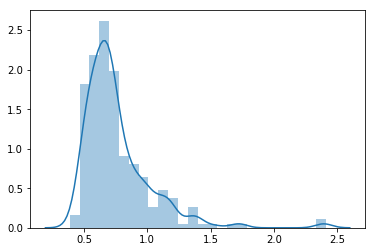

In [371]:
plt.close()
sns.distplot(mi4d[:,90000])
plt.show()

In [386]:
sns.distplot?

In [382]:
mmod = GaussianMixture(n_components=2)

In [383]:
mmod_a = mmod.fit(mi4d[:,90000].reshape(-1,1))

In [387]:
labs = mmod_a.predict(mi4d[:,90000].reshape(-1,1))

In [390]:
lprob1 = mmod_a.predict_proba(mi4d[:,90000].reshape(-1,1))[:,0]
lprob2 = mmod_a.predict_proba(mi4d[:,90000].reshape(-1,1))[:,1]

In [9]:
plt.close()
sns.kdeplot([mi4d[:,90000][x] for x in range(len(mi4d[:,90000])) if labs[x] == 0])
sns.kdeplot([mi4d[:,90000][x] for x in range(len(mi4d[:,90000])) if labs[x] == 1])
sns.distplot(mi4d[:,90000])
plt.show()

NameError: name 'mi4d' is not defined

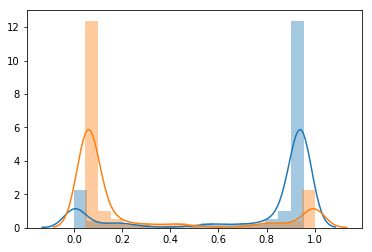

In [392]:
plt.close()
sns.distplot(lprob1)
sns.distplot(lprob2)
plt.show()

In [402]:
mmod_a.bic(mi4d[:,90000].reshape(-1,1))

-43.066199328903515

In [403]:
GaussianMixture(n_components=1).fit(mi4d[:,90000].reshape(-1,1)).bic(mi4d[:,90000].reshape(-1,1))

71.680268648784477

In [404]:
GaussianMixture(n_components=3).fit(mi4d[:,90000].reshape(-1,1)).bic(mi4d[:,90000].reshape(-1,1))

-51.868908468082481

In [405]:
GaussianMixture(n_components=4).fit(mi4d[:,90000].reshape(-1,1)).bic(mi4d[:,90000].reshape(-1,1))

-48.306629697237973

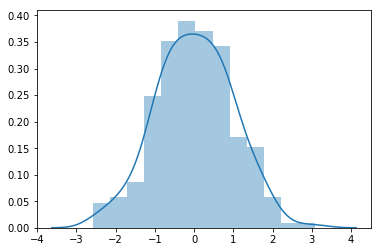

In [85]:
normrand = np.random.normal(size=241)
plt.close()
sns.distplot(normrand)
plt.show()

In [88]:
GaussianMixture(n_components=1).fit(normrand.reshape(-1,1)).bic(normrand.reshape(-1,1))

685.52323050737778

In [90]:
GaussianMixture(n_components=2).fit(normrand.reshape(-1,1)).bic(normrand.reshape(-1,1))

702.9684968460989

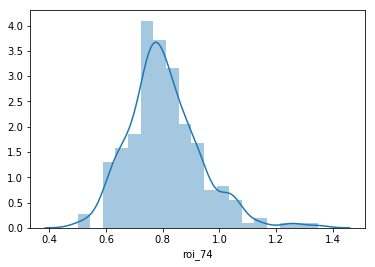

In [138]:
plt.close()
sns.distplot(ndf['roi_74'])
plt.show()

In [142]:
ndf['roi_74'].values[labs==0].mean() > ndf['roi_74'].values[labs==1].mean() 

True

In [146]:
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        print(col,'one component solution')
    else:
        labs = GMM2.fit(ndf[col].values.reshape(-1,1)).predict(ndf[col].values.reshape(-1,1))
        numb = len([x for x in labs if x == 1])/len(ndf[col])
        print(col,'number of 2nd component subs:',numb)
        if ndf[col].values[labs==0].mean() > ndf[col].values[labs==1].mean():
            print('WRONG WAY!!!')

roi_1 one component solution
roi_2 number of 2nd component subs: 0.04149377593360996
roi_3 number of 2nd component subs: 0.22821576763485477
roi_4 one component solution
roi_5 number of 2nd component subs: 0.058091286307053944
roi_6 number of 2nd component subs: 0.024896265560165973
roi_7 number of 2nd component subs: 0.08298755186721991
roi_8 number of 2nd component subs: 0.3070539419087137
roi_9 number of 2nd component subs: 0.024896265560165973
roi_10 number of 2nd component subs: 0.979253112033195
WRONG WAY!!!
roi_11 number of 2nd component subs: 0.9128630705394191
WRONG WAY!!!
roi_12 number of 2nd component subs: 0.12448132780082988
roi_13 number of 2nd component subs: 0.12033195020746888
roi_14 number of 2nd component subs: 0.11203319502074689
roi_15 one component solution
roi_16 number of 2nd component subs: 0.029045643153526972
roi_17 one component solution
roi_18 number of 2nd component subs: 0.029045643153526972
roi_19 one component solution
roi_20 number of 2nd component sub

In [180]:
mm_ndf = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
    else:
        labs = GMM2.fit(ndf[col].values.reshape(-1,1)).predict(ndf[col].values.reshape(-1,1))
        if ndf[col].values[labs==0].mean() > ndf[col].values[labs==1].mean():
            mm_ndf.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
        else:
            mm_ndf.loc[:,col] = GMM2.fit(ndf[col].values.reshape(-1,1)
                                    ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]

In [181]:
mm_ndf_simple = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    mm_ndf_simple.loc[:,col] = GMM2.fit(ndf[col].values.reshape(-1,1)
                                ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]

In [182]:
mm_ndf_alt = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf_alt.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
    else:
        mm_ndf_alt.loc[:,col] = GMM2.fit(ndf[col].values.reshape(-1,1)
                                    ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]

In [204]:
mm_ndf_alt_inv = pandas.DataFrame(index = ndf.index, columns = ndf.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf:
    bic1 = GMM1.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf[col].values.reshape(-1,1)).bic(ndf[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf_alt_inv.loc[:,col] = ed.ECDF(ndf[col].values)(ndf[col])
    else:
        labs = GMM2.fit(ndf[col].values.reshape(-1,1)).predict(ndf[col].values.reshape(-1,1))
        probs = GMM2.fit(ndf[col].values.reshape(-1,1)
                        ).predict_proba(ndf[col].values.reshape(-1,1))[:,1]
        if ndf[col].values[labs==0].mean() > ndf[col].values[labs==1].mean():
            mm_ndf_alt_inv.loc[:,col] = 1 - probs
        else:
            mm_ndf_alt_inv.loc[:,col] = probs

In [112]:
jnk = GMM1.fit(ndf[ndf.columns[0]].values.reshape(-1,1))

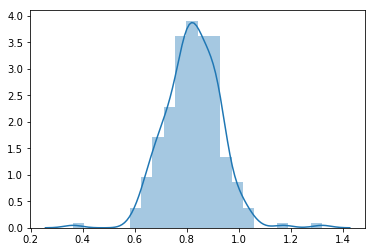

In [111]:
plt.close()
sns.distplot(ndf[ndf.columns[0]].values.reshape(-1,1))
plt.show()

In [122]:
len(jnk.score_samples(ndf[ndf.columns[0]].values.reshape(-1,1)))

241

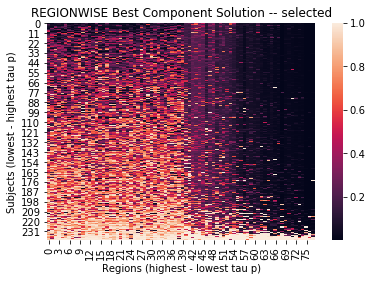

In [183]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf,copy=True)
sorter.loc[:,'mean'] = mm_ndf.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf,copy=True)
sorter2.loc['mean',:] = mm_ndf.mean(axis=0)
sns.heatmap(mm_ndf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Best Component Solution -- selected')
plt.show()

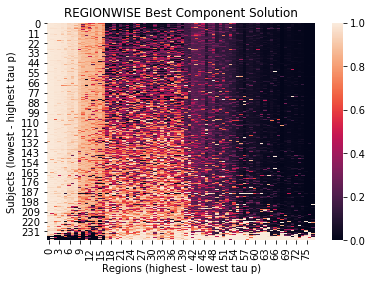

In [184]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_alt,copy=True)
sorter.loc[:,'mean'] = mm_ndf_alt.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_alt,copy=True)
sorter2.loc['mean',:] = mm_ndf_alt.mean(axis=0)
sns.heatmap(mm_ndf_alt.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Best Component Solution')
plt.show()

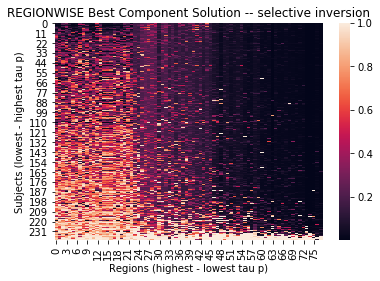

In [206]:
#mm_ndf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_alt_inv,copy=True)
sorter.loc[:,'mean'] = mm_ndf_alt_inv.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_alt_inv,copy=True)
sorter2.loc['mean',:] = mm_ndf_alt_inv.mean(axis=0)
sns.heatmap(mm_ndf_alt_inv.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Best Component Solution -- selective inversion')
plt.show()

In [219]:
ldf = pandas.read_csv('/home/users/jvogel/git/pycourse/stuff/dst_labels.csv',header=None)
ldf.columns = ['label','ROI']
ldf.head()

,label,ROI
0,1,Caudal anterior cingulate
1,2,Caudal middle frontal
2,3,Cuneus
3,4,entorinal
4,5,fusiform


In [222]:
for col in mm_ndf_alt_inv.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, mm_ndf_alt_inv[col].mean())

roi_37 [' Globus Pallidus'] 0.502074688797
roi_78 [' Thalamus'] 0.502074688797
roi_42 [' Cuneus'] 0.502074688797
roi_19 [' Pericalcarine'] 0.502074688797
roi_32 [' Basal forebrain'] 0.502074688797
roi_75 [' Hippocampus'] 0.502074688797
roi_72 [' Amygdala'] 0.502074688797
roi_58 [' Pericalcarine'] 0.502074688797
roi_56 [' Pars orbitalis'] 0.502074688797
roi_43 [' entorinal'] 0.502074688797
roi_31 [' Insula'] 0.502074688797
roi_36 [' Hippocampus'] 0.502074688797
roi_15 [' Paracentral '] 0.502074688797
roi_17 [' Pars orbitalis'] 0.502074688797
roi_77 [' Putamen'] 0.502074688797
roi_38 [' Putamen'] 0.502074688797
roi_76 [' Globus Pallidus'] 0.502074688797
roi_35 [' Caudate'] 0.502074688797
roi_33 [' Amygdala'] 0.502074688797
roi_39 [' Thalamus'] 0.502074688797
roi_1 [' Caudal anterior cingulate'] 0.502074688797
roi_4 [' entorinal'] 0.502074688797
roi_71 [' Basal forebrain'] 0.502074688797
roi_34 [' Hypothalamus???'] 0.397298919605
roi_8 [' Isthmus cingulate'] 0.396278069927
roi_63 [' Rostr

In [ ]:
mm_ndf_simple.drop(['amyloid','DX'])

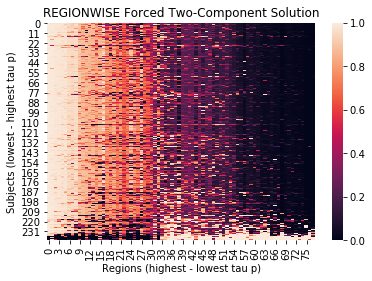

In [276]:
#mm_ndf_simple.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_simple,copy=True)
sorter.loc[:,'mean'] = mm_ndf_simple.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_simple,copy=True)
sorter2.loc['mean',:] = mm_ndf_simple.mean(axis=0)
sns.heatmap(mm_ndf_simple.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE Forced Two-Component Solution')
plt.show()

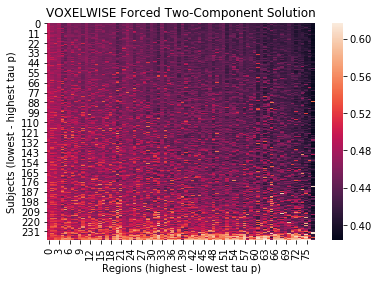

In [224]:
#mmdf.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mmdf,copy=True)
sorter.loc[:,'mean'] = mmdf.mean(axis=1)
sorter2 = pandas.DataFrame(mmdf,copy=True)
sorter2.loc['mean',:] = mmdf.mean(axis=0)
sns.heatmap(mmdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('VOXELWISE Forced Two-Component Solution')
plt.show()

In [227]:
for col in mmdf.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, mmdf[col].mean())

roi_1 [' Caudal anterior cingulate'] 0.491425068252
roi_76 [' Globus Pallidus'] 0.488721809529
roi_77 [' Putamen'] 0.484184952857
roi_17 [' Pars orbitalis'] 0.480557597157
roi_56 [' Pars orbitalis'] 0.477815706375
roi_19 [' Pericalcarine'] 0.477336054845
roi_31 [' Insula'] 0.47596405678
roi_58 [' Pericalcarine'] 0.47570725779
roi_39 [' Thalamus'] 0.474677917458
roi_43 [' entorinal'] 0.474005249046
roi_38 [' Putamen'] 0.4736499969
roi_10 [' Lateral orbitofronal'] 0.473196161899
roi_4 [' entorinal'] 0.473176313847
roi_42 [' Cuneus'] 0.472731880409
roi_30 [' Transverse temporal'] 0.472175700646
roi_32 [' Basal forebrain'] 0.472168241621
roi_78 [' Thalamus'] 0.471831242545
roi_12 [' Medial orbitofrontal'] 0.471206951695
roi_37 [' Globus Pallidus'] 0.470721267833
roi_24 [' Rostral anterior cingulate'] 0.470580232925
roi_72 [' Amygdala'] 0.470325064976
roi_71 [' Basal forebrain'] 0.469851392349
roi_20 [' Postcentral'] 0.468580550416
roi_40 [' Caudal anterior cingulate'] 0.468127711391
roi_49

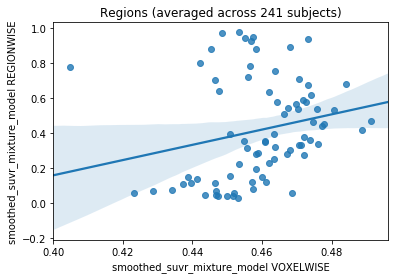

0.0502669942499


In [158]:
plt.close()
sns.regplot(mmdf.mean(axis=0),mm_ndf_simple.mean(axis=0))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=0),mm_ndf_simple.mean(axis=0))[0]**2)

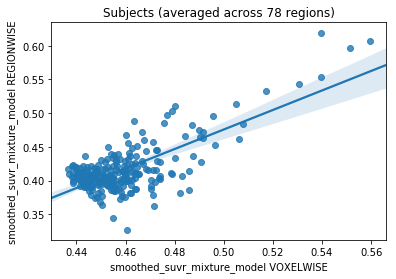

0.542945903999


In [159]:
plt.close()
sns.regplot(mmdf.mean(axis=1),mm_ndf_simple.mean(axis=1))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Subjects (averaged across 78 regions)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=1),mm_ndf_simple.mean(axis=1))[0]**2)

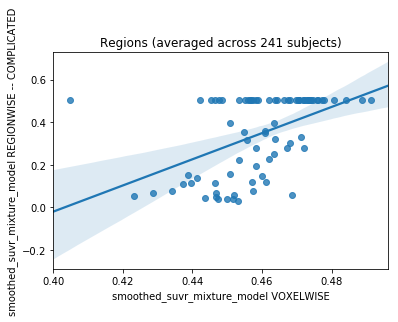

0.245648098491


In [160]:
plt.close()
sns.regplot(mmdf.mean(axis=0),mm_ndf.mean(axis=0))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=0),mm_ndf.mean(axis=0))[0]**2)

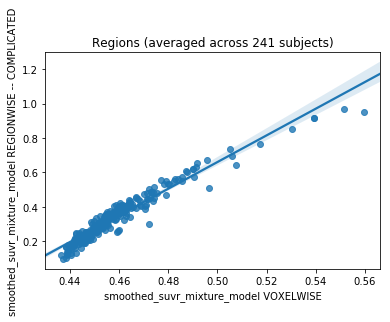

0.931735234364


In [161]:
plt.close()
sns.regplot(mmdf.mean(axis=1),mm_ndf.mean(axis=1))
plt.xlabel('smoothed_suvr_mixture_model VOXELWISE')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(mmdf.mean(axis=1),mm_ndf.mean(axis=1))[0]**2)

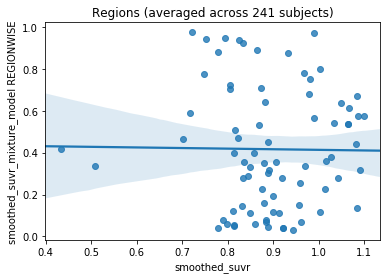

0.000150720313983


In [163]:
plt.close()
sns.regplot(ndf.mean(axis=0),mm_ndf_simple.mean(axis=0))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=0),mm_ndf_simple.mean(axis=0))[0]**2)

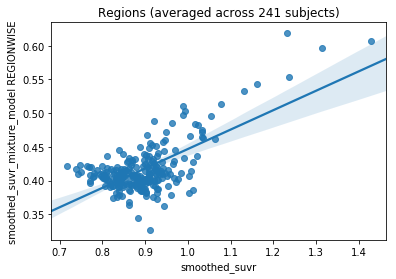

0.457251419893


In [162]:
plt.close()
sns.regplot(ndf.mean(axis=1),mm_ndf_simple.mean(axis=1))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=1),mm_ndf_simple.mean(axis=1))[0]**2)

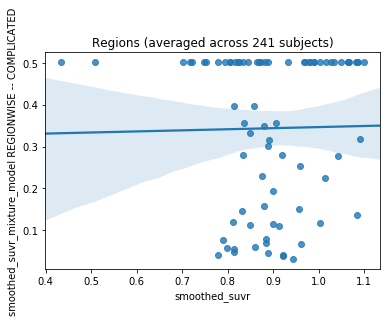

0.000299893428588


In [164]:
plt.close()
sns.regplot(ndf.mean(axis=0),mm_ndf.mean(axis=0))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=0),mm_ndf.mean(axis=0))[0]**2)

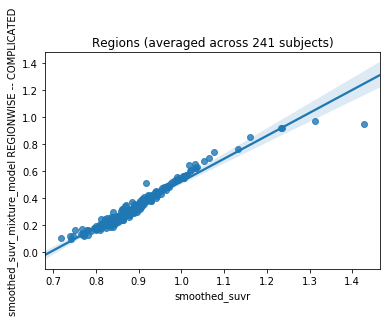

0.949141068305


In [165]:
plt.close()
sns.regplot(ndf.mean(axis=1),mm_ndf.mean(axis=1))
plt.xlabel('smoothed_suvr')
plt.ylabel('smoothed_suvr_mixture_model REGIONWISE -- COMPLICATED')
plt.title('Regions (averaged across 241 subjects)')
plt.show()
print(stats.pearsonr(ndf.mean(axis=1),mm_ndf.mean(axis=1))[0]**2)

In [247]:
mm_ndf_ica2_simple = pandas.DataFrame(index = ndf_ica2.index, columns = ndf_ica2.columns)
GMM1 = GaussianMixture(n_components=1,random_state=123)
GMM2 = GaussianMixture(n_components=2,random_state=123)
for col in ndf_ica2:
    bic1 = GMM1.fit(ndf_ica2[col].values.reshape(-1,1)).bic(ndf_ica2[col].values.reshape(-1,1))
    bic2 = GMM2.fit(ndf_ica2[col].values.reshape(-1,1)).bic(ndf_ica2[col].values.reshape(-1,1))
    if bic1 < bic2:
        mm_ndf_ica2_simple.loc[:,col] = ed.ECDF(ndf_ica2[col].values)(ndf_ica2[col])
    else:
        labs = GMM2.fit(ndf_ica2[col].values.reshape(-1,1)).predict(ndf_ica2[col].values.reshape(-1,1))
        probs = GMM2.fit(ndf_ica2[col].values.reshape(-1,1)
                        ).predict_proba(ndf_ica2[col].values.reshape(-1,1))[:,1]
        if ndf_ica2[col].values[labs==0].mean() > ndf_ica2[col].values[labs==1].mean():
            mm_ndf_ica2_simple.loc[:,col] = 1 - probs
        else:
            mm_ndf_ica2_simple.loc[:,col] = probs

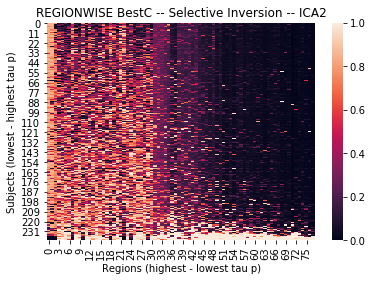

In [248]:
#mm_ndf_simple.drop(['amyloid','DX'],axis=1,inplace=True)
plt.close()
sorter = pandas.DataFrame(mm_ndf_ica2_simple,copy=True)
sorter.loc[:,'mean'] = mm_ndf_ica2_simple.mean(axis=1)
sorter2 = pandas.DataFrame(mm_ndf_ica2_simple,copy=True)
sorter2.loc['mean',:] = mm_ndf_ica2_simple.mean(axis=0)
sns.heatmap(mm_ndf_ica2_simple.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns].values)
plt.xlabel('Regions (highest - lowest tau p)')
plt.ylabel('Subjects (lowest - highest tau p)')
plt.title('REGIONWISE BestC -- Selective Inversion -- ICA2')
plt.show()

In [249]:
for col in mm_ndf_ica2_simple.loc[sorter.sort_values('mean',axis=0,ascending=True).index
                    ][sorter2.sort_values('mean',axis=1,ascending=False).columns]:
    roi_num = col.split('_')[-1]
    print(col, ldf[ldf.label==int(roi_num)]['ROI'].values, mm_ndf_ica2_simple[col].mean())

roi_38 [' Putamen'] 0.729993940285
roi_77 [' Putamen'] 0.68542024956
roi_16 [' Pars opercularis'] 0.576379614033
roi_42 [' Cuneus'] 0.502074688797
roi_3 [' Cuneus'] 0.502074688797
roi_33 [' Amygdala'] 0.502074688797
roi_75 [' Hippocampus'] 0.502074688797
roi_35 [' Caudate'] 0.502074688797
roi_15 [' Paracentral '] 0.502074688797
roi_1 [' Caudal anterior cingulate'] 0.502074688797
roi_74 [' Caudate'] 0.502074688797
roi_12 [' Medial orbitofrontal'] 0.502074688797
roi_30 [' Transverse temporal'] 0.502074688797
roi_71 [' Basal forebrain'] 0.502074688797
roi_72 [' Amygdala'] 0.502074688797
roi_17 [' Pars orbitalis'] 0.502074688797
roi_19 [' Pericalcarine'] 0.502074688797
roi_34 [' Hypothalamus???'] 0.502074688797
roi_76 [' Globus Pallidus'] 0.502074688797
roi_32 [' Basal forebrain'] 0.502074688797
roi_54 [' Paracentral '] 0.502074688797
roi_58 [' Pericalcarine'] 0.502074688797
roi_37 [' Globus Pallidus'] 0.502074688797
roi_36 [' Hippocampus'] 0.502074688797
roi_78 [' Thalamus'] 0.50207468879

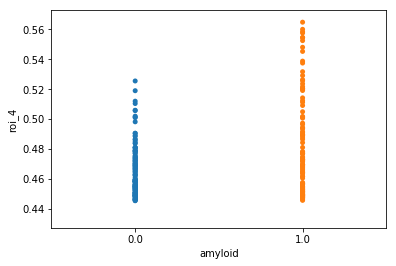

In [253]:
plt.close()
sns.stripplot(x='amyloid',y='roi_4',data=mmdf)
plt.show()

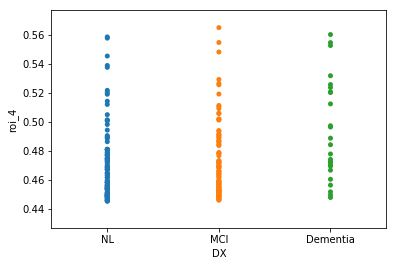

In [255]:
plt.close()
sns.stripplot(x='DX',y='roi_4',data=mmdf)
plt.show()

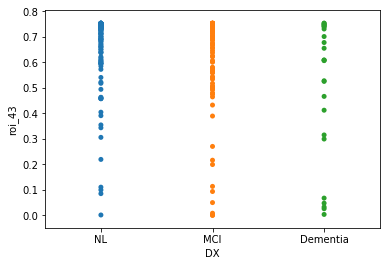

In [260]:
plt.close()
sns.stripplot(x='DX',y='roi_43',data=mm_ndf_simple)
plt.show()

In [262]:
mmdf.values.shape

(241, 80)

In [ ]:
tdf.AGE

In [279]:
for i,row in idf.iterrows():
    age = tdf[(tdf.ID == row['subject']) & (tdf.visit == row['visit'])]['AGE'].values
    if len(age) > 0:
        idf.loc[i,'age'] = age[0]

In [289]:
len([x for x in idf.age if not pandas.notnull(x)])

5

In [293]:
#mmdf.loc[:,'age'] = idf.age
#mmdf.drop(['amyloid','DX'],axis=1,inplace=True)
for col in mmdf.columns[:78]:
    r,p = stats.pearsonr(mmdf.dropna()[col].dropna(),mmdf.dropna()['age'])
    if p<0.05:
        print(col,r,p)

roi_4 -0.134197384865 0.0394023477313
roi_17 -0.174542689024 0.00719240146266
roi_33 -0.152014224255 0.0194661104507
roi_35 0.182551399887 0.00490518251626
roi_37 0.248080621368 0.000117526894158
roi_38 0.144090449775 0.0268721857613
roi_63 -0.128553352143 0.0485433666536
roi_72 -0.130523760449 0.0451692645159
roi_74 0.216304304432 0.000822902565745
roi_76 0.133506907651 0.0404362065356


In [1]:
plabs= {'SUVR_smoothed_prob': pdf, 'smoothed_refnormed_prob': rpdf,
       'voxelwise_2c_mixturemod': mmdf, 'regionwise_2c_mixturemod': mm_ndf}
probs = {}
for nm, df in plabs.items():
    if 'amyloid' in df.columns:
        df.drop('amyloid',axis=1,inplace=True)
    if 'DX' in df.columns:
        df.drop('DX',axis=1,inplace=True)
    df.loc[:,'age'] = idf.age.values
    probs.update({nm: df.dropna()[df.columns[:78]].transpose().values})
    

NameError: name 'pdf' is not defined

In [315]:
probs.update({'ages': df.dropna()['age'].values.reshape(1,len(df.dropna()['age']))})

In [316]:
savemat('/home/users/jvogel/Science/scripts/ESM/2018_03_probs',probs)